In [1]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import os
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image
import os
import zipfile
from tqdm.notebook import tqdm

In [3]:
datasetPath = "./drive/MyDrive/Colab Notebooks/Capstone Project/Facial Expression Dataset Filtered.zip"
#datasetPath = "./mma-facial-expression.zip"
with zipfile.ZipFile(datasetPath) as file :
    file.extractall()

In [5]:
"""
disgust : 3231
happy : 28592
surprise : 8113
neutral : 29384
sad : 12223
angry : 6566
fear : 4859
"""

for i in os.listdir("./Facial Expression Dataset Filtered/train") :
    print(i, ":", len(os.listdir("./Facial Expression Dataset Filtered/train/" + i)))

fear : 4859
happy : 28209
angry : 5751
neutral : 28405
surprise : 8113
disgust : 3231
sad : 10819


In [6]:
def prepareImage(path):
    #img = tf.keras.preprocessing.image.load_img(file, target_size=(224, 224))
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (48, 48))
    #img = tf.keras.preprocessing.image.img_to_array(img)
    return img
    #img = np.expand_dims(img, axis=0)
    #return tf.keras.applications.mobilenet.preprocess_input(img)

In [21]:
trainDir = "./Facial Expression Dataset Filtered/train/"
#trainDir = "./MMAFEDB/train/"
expression = ["angry", "happy", "neutral", "sad"]

imgTrain = []
labelTrain = []

numOfData = 3000
for label, labelName in enumerate(expression) :
    for i in tqdm(os.listdir(trainDir + labelName)[:numOfData]) :
        imgTrain.append(prepareImage(os.path.join(trainDir, labelName, i)))
        tempLabel = np.zeros(len(expression))
        tempLabel[label] = 1
        labelTrain.append(tempLabel)
        #labelTrain.append(label)
        #imgTrain = np.concatenate((imgTrain, prepareImage(trainDir + i + "/" + j)))

imgTrain = np.array(imgTrain)
labelTrain = np.array(labelTrain)

index = np.arange(len(expression) * numOfData)
np.random.seed(1)
np.random.shuffle(index)

imgTrain = imgTrain[index]
labelTrain = labelTrain[index]

In [ ]:
for i in labelTrain[:100] :
    print(i)

In [23]:
baseModel = tf.keras.applications.MobileNetV2(include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(baseModel.output)
dense1 = tf.keras.layers.Dense(100, activation="relu")(avg)
dense2 = tf.keras.layers.Dense(100, activation="relu")(dense1)
output = tf.keras.layers.Dense(len(expression), activation="softmax")(dense2)
model = tf.keras.models.Model(inputs=baseModel.input, outputs=output)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

for i in baseModel.layers :
    i.trainable = True

#model.summary()

In [24]:
history = model.fit(imgTrain, labelTrain, epochs=30)

Epoch 1/30
375/375 [==============================] - 12s 24ms/step - loss: 1.3861 - accuracy: 0.3421
Epoch 2/30
375/375 [==============================] - 9s 24ms/step - loss: 1.1246 - accuracy: 0.5084
Epoch 3/30
375/375 [==============================] - 9s 24ms/step - loss: 0.9767 - accuracy: 0.5990
Epoch 4/30
375/375 [==============================] - 9s 25ms/step - loss: 0.9012 - accuracy: 0.6362
Epoch 5/30
375/375 [==============================] - 9s 25ms/step - loss: 0.8324 - accuracy: 0.6669
Epoch 6/30
375/375 [==============================] - 9s 25ms/step - loss: 0.7967 - accuracy: 0.6838
Epoch 7/30
375/375 [==============================] - 9s 25ms/step - loss: 0.7572 - accuracy: 0.6976
Epoch 8/30
375/375 [==============================] - 9s 25ms/step - loss: 0.7024 - accuracy: 0.7281
Epoch 9/30
375/375 [==============================] - 9s 25ms/step - loss: 0.6986 - accuracy: 0.7260
Epoch 10/30
375/375 [==============================] - 9s 25ms/step - loss: 0.6201 - accur

(1, 48, 48, 3)


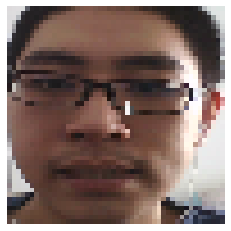

[[1.4809146e-02 2.9948777e-05 9.8156047e-01 3.6004074e-03]] 
 neutral


In [46]:
#img = cv2.imread("./angry999.png")
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.resize(img, (48, 48))
img = prepareImage("./drive/MyDrive/Colab Notebooks/Capstone Project/Test Photo/neutral9003.png")
img = np.expand_dims(img, axis=0)
print(img.shape)

plt.imshow(img[0])
plt.axis("off")
plt.show()

prediction = model.predict(img)
print(prediction, "\n", expression[np.argmax(prediction)])

In [27]:
#testDir = "./Facial Expression Dataset/test/"
testDir = "./Facial Expression Dataset Filtered/test/"
#expression = ["angry", "happy", "neutral", "sad"]
#expression = ["angry", "happy"]

imgTest = []
labelTest = []

numOfData = 500
for label, labelName in enumerate(expression) :
    for i in tqdm(os.listdir(testDir + labelName)[:numOfData]) :
        imgTest.append(prepareImage(os.path.join(testDir, labelName, i)))
        tempLabel = np.zeros(len(expression))
        tempLabel[label] = 1
        labelTest.append(tempLabel)
        #labelTrain.append(label)
        #imgTrain = np.concatenate((imgTrain, prepareImage(trainDir + i + "/" + j)))

imgTest = np.array(imgTest)
labelTest = np.array(labelTest)

prediction = model.predict(imgTest)
cm = confusion_matrix(np.argmax(labelTest, axis=1), np.argmax(prediction, axis=1))
#for i in prediction :
#    print(np.argmax(i))

[[289  29  52 130]
 [ 35 195 124 146]
 [ 38  32 288 142]
 [ 46  35 130 289]]
Label : angry    Prediction : sad


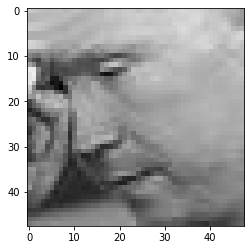

In [26]:
print(cm)
index = 0
print("Label :", expression[np.argmax(labelTest[index])], "   Prediction :", expression[np.argmax(prediction[index])])
plt.imshow(imgTest[index])
plt.show()

In [ ]:
import os

baseDir = "./MMAFEDB"
trainDir = os.path.join(baseDir, "train")
valDir = os.path.join(baseDir, "valid")
testDir = os.path.join(baseDir, "test")

trainDatagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0,
                                                               rotation_range = 40,
                                                               width_shift_range = 0.2,
                                                               height_shift_range = 0.2,
                                                               shear_range = 0.2,
                                                               zoom_range = 0.2,
                                                               horizontal_flip = True)

testDatagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)

trainGenerator = trainDatagen.flow_from_directory(trainDir,
                                                   batch_size = 20,
                                                   class_mode = 'categorical', 
                                                   target_size = (224, 224))     

validationGenerator = testDatagen.flow_from_directory(valDir,
                                                       batch_size  = 20,
                                                       class_mode  = 'categorical', 
                                                       target_size = (224, 224))

Found 92968 images belonging to 7 classes.
Found 17356 images belonging to 7 classes.


In [ ]:
history = model.fit(
            trainGenerator,
            validation_data = validationGenerator,
            steps_per_epoch = 100,
            epochs = 5,
            validation_steps = 50)

In [49]:
model.save("./model happy angry neutral sad good 2")

INFO:tensorflow:Assets written to: ./model happy angry neutral sad good 2/assets


In [50]:
! zip -rq "model happy angry neutral sad good 2.zip" "model happy angry neutral sad good 2"